In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [43]:
df = pd.read_csv('apartment_cost_list.csv')

In [44]:
df.head()

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Job #                   19613 non-null  int64 
 1   Borough                 19613 non-null  object
 2   House #                 19613 non-null  object
 3   Street Name             19613 non-null  object
 4   Block                   19613 non-null  int64 
 5   Lot                     19613 non-null  int64 
 6   Bin #                   19613 non-null  int64 
 7   Job Type                19613 non-null  object
 8   Community - Board       19613 non-null  int64 
 9   Curb Cut                16 non-null     object
 10  Fully Permitted         15625 non-null  object
 11  Initial Cost            19613 non-null  object
 12  Proposed Zoning Sqft    19613 non-null  int64 
 13  Horizontal Enlrgmt      163 non-null    object
 14  Vertical Enlrgmt        242 non-null    object
 15  En

In [46]:
163/19613

0.008310814255850712

In [47]:
242/19613

0.012338754907459339

In [48]:
16/19613

0.0008157854484270637

In [49]:
15625/19613

0.7966654769795544

In [57]:
df

,Job #,Borough,House #,Street Name,Block,Lot,Bin #,Job Type,Community - Board,Curb Cut,Fully Permitted,Initial Cost,Proposed Zoning Sqft,Horizontal Enlrgmt,Vertical Enlrgmt,Enlargement SQ Footage,Zoning Dist1,Job Description,Cost
0,123768976,MANHATTAN,1598,2ND AVENUE,1545,49,1049907,A2,108,NaN,NaN,$65000.00,0,NaN,NaN,0,C1-9,INTERIOR RENOVATION TO COMBINE APARTMENT 2E AN...,NaN
1,140922893,MANHATTAN,160,E 89 ST,1517,43,1048094,A2,108,NaN,07/14/2020,$85000.00,0,NaN,NaN,0,R8B,HEREBY FILING APPLICATION FOR THE INTERIOR REN...,$85000.00
2,301773579,BROOKLYN,65,GATES AVENUE,1962,86,3056039,A1,302,NaN,05/23/2007,$60000.00,0,NaN,NaN,0,R6,Change existing four story and basement brick ...,$60000.00
3,301976057,BROOKLYN,1401,OCEAN AVENUE,7584,35,3206621,A2,314,NaN,02/28/2006,$75000.00,0,NaN,NaN,0,NaN,COMBINING OF APARTMENT 4A &amp; 4L.NO CHANGEIN...,$75000.00
4,301989276,BROOKLYN,154,NOBLE STREET,2573,10,3065099,A1,301,NaN,09/29/2006,$40000.00,0,NaN,NaN,0,C4-3,New C of O for existing building. New duplex a...,$40000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,122923649,MANHATTAN,315,WEST 33RD STREET,757,22,1013552,A2,104,NaN,03/21/2017,$60000.00,0,NaN,NaN,0,C6-4,RENOVATION OF APARTMENTS 8N &amp; 12A. ARCHITE...,$60000.00
19609,121090112,MANHATTAN,110,DUANE STREET,150,22,1001645,A2,101,NaN,07/17/2012,$40000.00,0,NaN,NaN,0,C6-2A,APARTMENT RENVOATION AT APT #4R. DEMOLISH AND ...,$40000.00
19610,102937342,MANHATTAN,166,BANK STREET,638,4,1078335,A2,102,NaN,02/07/2001,$80000.00,0,NaN,NaN,0,C6-2,Interior renovation of an existing apartment. ...,$80000.00
19611,200838558,BRONX,2762,KINGSBRIDGE TERRACE,3253,90,2015521,A2,208,NaN,NaN,$40000.00,0,NaN,NaN,0,R6,Proposed to renovate existing apartments. No c...,$40000.00


In [54]:
df['Cost'] = pd.to_numeric(df['Cost'])
df.columns

ValueError: Unable to parse string "$60000.00" at position 2

In [13]:
df['Street Name'].unique()

array(['2ND AVENUE', 'E 89 ST', 'GATES AVENUE', ..., 'SENATOR STREET',
       'E. 12 ST.', 'HOWARD AVENUE'], dtype=object)

In [14]:
df = df.drop(['Curb Cut', 'Fully Permitted','Initial Cost','Horizontal Enlrgmt','Vertical Enlrgmt','Job #','Zoning Dist1','Job Description','Street Name'],axis=1)

In [15]:
df['House #'] = pd.to_numeric(df['Cost'])
df

,Borough,House #,Block,Lot,Bin #,Job Type,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage,Cost
0,MANHATTAN,60000.0,1545,49,1049907,A2,108,0,0,60000.0
1,MANHATTAN,60000.0,1517,43,1048094,A2,108,0,0,60000.0
2,BROOKLYN,60000.0,1962,86,3056039,A1,302,0,0,60000.0
3,BROOKLYN,60000.0,7584,35,3206621,A2,314,0,0,60000.0
4,BROOKLYN,60000.0,2573,10,3065099,A1,301,0,0,60000.0
...,...,...,...,...,...,...,...,...,...,...
19608,MANHATTAN,60000.0,757,22,1013552,A2,104,0,0,60000.0
19609,MANHATTAN,60000.0,150,22,1001645,A2,101,0,0,60000.0
19610,MANHATTAN,60000.0,638,4,1078335,A2,102,0,0,60000.0
19611,BRONX,60000.0,3253,90,2015521,A2,208,0,0,60000.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Borough                 19613 non-null  object 
 1   House #                 19613 non-null  float64
 2   Block                   19613 non-null  int64  
 3   Lot                     19613 non-null  int64  
 4   Bin #                   19613 non-null  int64  
 5   Job Type                19613 non-null  object 
 6   Community - Board       19613 non-null  int64  
 7   Proposed Zoning Sqft    19613 non-null  int64  
 8   Enlargement SQ Footage  19613 non-null  int64  
 9   Cost                    19613 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 1.5+ MB


In [17]:
df = pd.get_dummies(df,drop_first=True)
df

,House #,Block,Lot,Bin #,Community - Board,Proposed Zoning Sqft,Enlargement SQ Footage,Cost,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Job Type_A2,Job Type_A3
0,60000.0,1545,49,1049907,108,0,0,60000.0,0,1,0,0,1,0
1,60000.0,1517,43,1048094,108,0,0,60000.0,0,1,0,0,1,0
2,60000.0,1962,86,3056039,302,0,0,60000.0,1,0,0,0,0,0
3,60000.0,7584,35,3206621,314,0,0,60000.0,1,0,0,0,1,0
4,60000.0,2573,10,3065099,301,0,0,60000.0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19608,60000.0,757,22,1013552,104,0,0,60000.0,0,1,0,0,1,0
19609,60000.0,150,22,1001645,101,0,0,60000.0,0,1,0,0,1,0
19610,60000.0,638,4,1078335,102,0,0,60000.0,0,1,0,0,1,0
19611,60000.0,3253,90,2015521,208,0,0,60000.0,0,0,0,0,1,0


<AxesSubplot:>

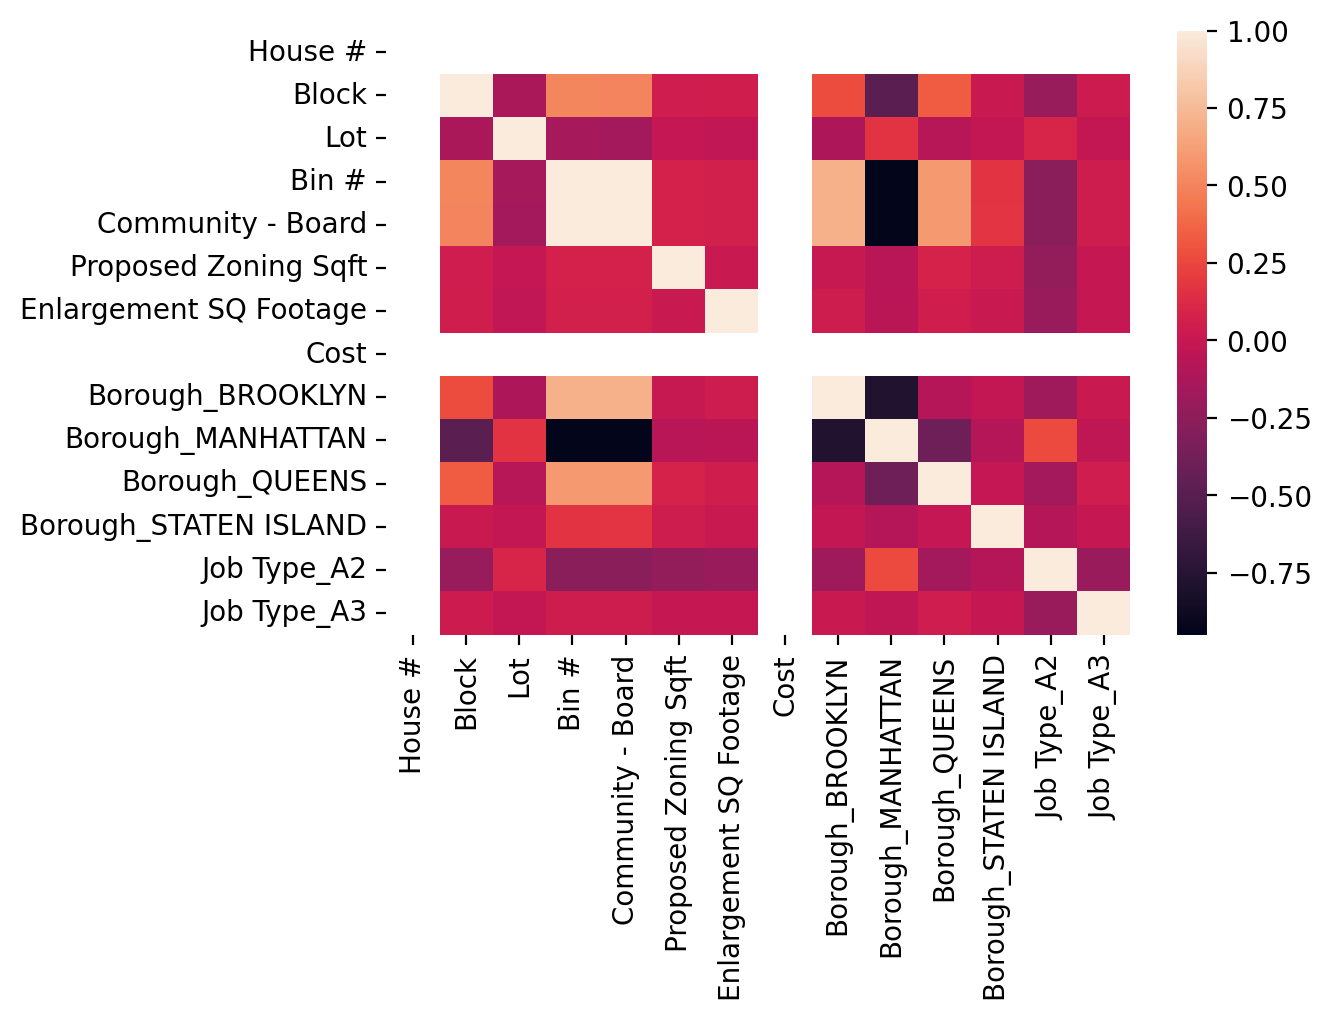

In [18]:
plt.figure(dpi=200)
sns.heatmap(df.corr(),annot=False)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19613 entries, 0 to 19612
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   House #                 19613 non-null  float64
 1   Block                   19613 non-null  int64  
 2   Lot                     19613 non-null  int64  
 3   Bin #                   19613 non-null  int64  
 4   Community - Board       19613 non-null  int64  
 5   Proposed Zoning Sqft    19613 non-null  int64  
 6   Enlargement SQ Footage  19613 non-null  int64  
 7   Cost                    19613 non-null  float64
 8   Borough_BROOKLYN        19613 non-null  uint8  
 9   Borough_MANHATTAN       19613 non-null  uint8  
 10  Borough_QUEENS          19613 non-null  uint8  
 11  Borough_STATEN ISLAND   19613 non-null  uint8  
 12  Job Type_A2             19613 non-null  uint8  
 13  Job Type_A3             19613 non-null  uint8  
dtypes: float64(2), int64(6), uint8(6)
memo

In [20]:
x = df.drop('Cost',axis=1)
y = df['Cost']

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)

In [22]:
elaModel = ElasticNet()

In [23]:
paramGrid = {
    'alpha': [0.001,0.01,0.1,1],
    'l1_ratio': [0,0.01,0.1,1],
}

In [25]:
elaModel.fit(xtrain,ytrain)

ElasticNet()

In [27]:
ypreds = elaModel.predict(xtest)

In [30]:
np.sqrt(mean_squared_error(ytest,ypreds))

0.0

In [31]:
mean_absolute_error(ytest,ypreds)

0.0

In [32]:
ytest

7170     60000.0
5268     60000.0
2580     60000.0
3445     60000.0
9972     60000.0
          ...   
2941     60000.0
16782    60000.0
2655     60000.0
18224    60000.0
4049     60000.0
Name: Cost, Length: 3923, dtype: float64

In [58]:
#Need to redo this from scratch